# E10 — Exercises on Calcium Handling

In this notebook we look at some exercises to explore intracellular calcium handling a bit more hands on. We will see if we get time to solve all of these problems and subproblems, but we might skip a few of them in the end.

This notebook contains the following exercises:

* [Exercise 1: A Simple Calcium Cycling Model](#1)
* [Exercise 2: Thermodynamic Limits of SERCA](#2)
* [Exercise 3: Thermodynamics of the NCX](#3)

<a id="1"></a>
## Exercise 1: A Simple Calcium Cycling Model

In this notebook you will formulate and implement a simple calcium cycling model to explore intracellular calcium handling a bit more hands on.
The model you will implement is based on ..., though we have changed some of the variable names from the original publication to make it more similar to how we present the material in L10.


Writing out the equations of the system

There are three domains:
* The intracellular cytosol
* The sarcoplasmic reticulum (SR)
* The extracellular space

We denote the concentration of calcium in each of these domains as $\rm [Ca^{2+}]_i$, $\rm [Ca^{2+}]_{\rm SR}$ and $\rm [Ca^{2+}]_e$ respectively. The first two of these are model states which change over time, while we assume the extracellular concentration to be constant.

* There is an external calcium entry through the sarcolemma: $J_{\rm entry}$

We assume this flux to be a passive, linear flux, driven by the concentration gradient across the sarcolemma, i.e.

\begin{equation}
J_{\rm entry} = k_1 \left({\rm [Ca^{2+}]_e} - {\rm [Ca^{2+}]_i} \right)
\end{equation}





We also define four fluxes between these domains:
* There is an external calcium entry through the sarcolemma: $J_{\rm entry}$
* There is an extrusion of calcium through the sarcolemma: $J_{\rm extrusion}$
* There is a release of calcium from the SR: $J_{\rm rel}$
* There is an uptake of calcium back into the SR: $J_{\rm uptake}$.


#### Exercise 1a) Describing the system

Based on what we have covered in the lecture, what are the main ion channels, exchangers or pumps responsible for each of these four fluxes in the cardiomyocyte?




\begin{equation}
\frac{\rm d [Ca^{2+}]_i}{{\rm d}t} = J_{\rm L} + J_{\rm rel} - J_{\rm NCX} - J_{\rm SERCA}.
\end{equation}

\begin{equation}
\frac{\rm d [Ca^{2+}]_i}{{\rm d}t} = \gamma \left(J_{\rm SERCA} - J_{\rm rel}\right).
\end{equation}

Here $\gamma$ is a model parameter representing the ratio of the cytoplasmic volume to the SR volume.


And then we need to implement expressions for the fluxes, which we do as follows

\begin{equation}
\end{equation}

In [20]:
k_entry = 5e-6 # 1/s
k_extrusion = 0.132 # 1/s
k_uptake = 3.78 # 1/s
kappa0 = 0.054 # 1/s
kappa1 = 2.4
Kd = 0.23
n = 3.8
gamma = 0.24

* Applying caffine to the system makes RyR more sensitive to calcium. Which means the dependence of $J_{\rm rel}$ to Cai should increase. What model parameters reflect this?

* The original paper by Friel states that the system will not produce oscillations if there is either no caffine or very high caffine in the system. This is because this effectively removes the dependence of the release current on the intracellular calcium and the system reduces to a linear model.

Play around with the relevant parameters and verify that this is actually the case.


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def rhs(t, y, Cao, k_entry, k_extrusion, k_uptake, kappa0, kappa1, Kd, n, gamma):
    # Split up the state vector
    Cai, CaSR = y    
    
    # Define the linear fluxes
    Jentry = k_entry * (Cao - Cai)
    Jextrusion = k_extrusion * Cai
    Juptake = k_uptake * Cai
    
    # Compute the release rate (CICR)
    k_rel = kappa0 + kappa1 * Cai**n/(Cai**n + Kd**n)
    Jrel = k_rel * (CaSR - Cai)
    
    # Define the derivatives
    dCai_dt = Jentry + Jrel - Jextrusion - Juptake
    dCaSR_dt = (Juptake - Jrel)/gamma
    
    return dCai_dt, dCaSR_dt

In [132]:
#constants
Cao = 1000;

k_entry = 2e-5 # 1/s
k_extrusion = 0.132 # 1/s
k_uptake = 0.9 # 1/s
kappa0 = 0.013 # 1/s
kappa1 = 0.58 # 1/s
Kd = 0.5 # µM
n = 3.
gamma = 0.24

##constants
#k_entry = 2*10**(-5);
#k_extrusion = 0.13;
#k_uptake = 0.9;
#kappa0 = 0.013;
#kappa1 = 0.58;
#Kd = 0.5 # µM
#n = 3
#gamma = 4.17;




In [133]:
# Define initial conditions and parameters needed by solve_ivp
T = (0, 1000)
y0 = (0.0795, 4.1725)
params = (Cao, k_entry, k_extrusion, k_uptake, kappa0, kappa1, Kd, n, gamma)

# Solve the ODE
solution = solve_ivp(rhs, T, y0, args=params, max_step=0.1)

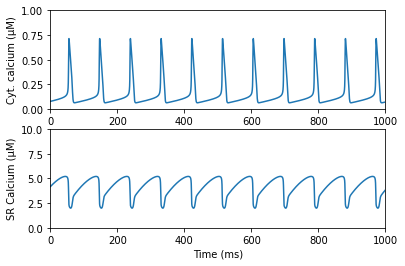

In [134]:
Cai, CaSR = solution.y
t = solution.t

plt.subplot(2, 1, 1)
plt.plot(t, Cai)
plt.ylabel('Cyt. calcium (µM)')
plt.xlim(*T)
plt.ylim(0, 1)

plt.subplot(2, 1, 2)
plt.plot(t, CaSR)
plt.xlabel('Time (ms)')
plt.ylabel('SR Calcium (µM)')
plt.xlim(*T)
plt.ylim(0, 10)
plt.show()




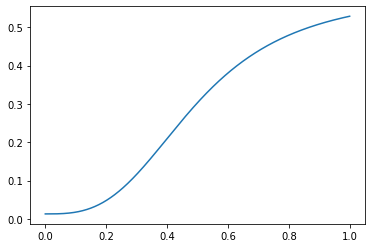

In [135]:
Cai = np.linspace(0, 1, 1001)
k_rel = kappa0 + kappa1 * Cai**n/(Cai**n + Kd**n)

plt.plot(Cai, k_rel)
plt.show()

**Exercise ) Exploring the CICR model (Widget)**

For CICR to be a robust mechanism the release current needs to be very small when the cytosolic Ca$^{2+}$ concentration is low, but increase rapidly at a certain threshold. Recall that the rate is given by

\begin{equation}
k_{\rm rel} = \kappa_0 + \kappa_1 \times \frac{\rm [Ca^{2+}]^n_{\rm i}}{K_{\rm d}^n + [{\rm Ca}^{2+}]_{\rm i}^n}
\end{equation}

Use the Widget below to explore how the rate of the release depends on its four parameters: $\kappa_0$, $\kappa_1$, $K_{\rm d}$, $n$.

In [2]:
from L10_widget import CICRWidget

CICRWidget().krel_widget()

interactive(children=(FloatSlider(value=0.1, description='kappa0', max=1.0), FloatSlider(value=0.6, descriptio…

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.integrate

from array import array
from pylab import *
from scipy.integrate.odepack import odeint


from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from math import exp, log, sqrt, pi

#constants
k_1 = 2*10**(-5);
k_2 = 0.13;
k_4 = 0.9;
kappa_1 = 0.013;
kappa_2 = 0.58;
K_d = 0.5;
n = 3;
gamma = 4.17;
c0 = 1000;

params = (k_1, k_2, k_4, kappa_1, kappa_2, K_d, n, gamma)


In [71]:
# Implement the right-hand-side of the system

def rhs(t, y, k_1, k_2, k_4, kappa_1, kappa_2, K_d, n, gamma):
    #c, cSR = y

    #input
    c = y[0];
    cSR = y[1];

    #calculation of k_3
    k_3 = kappa_1 + (kappa_2*c**n)/(K_d**n+c**n)
    #calcium entry
    J_L1 = k_1 * (c0 - c)
    #calcium extrusion
    J_P1 = k_2 * c;
    #calcium release
    J_L2  = k_3 *(cSR - c);
    #calcium uptake
    J_P2 = k_4 *c;

    #caculate time dependent functions
    dc_dt =   J_L1-J_P1+J_L2-J_P2
    dcSR_dt = gamma*(-J_L2+J_P2) 
    
    return [dc_dt, dcSR_dt]



In [72]:
# Make a vector of time points where solutions are to be computed
time = (0, 1000)

# Define the initial condition
y_0 = (0.0795, 4.1725)

# Call the ODE solver
solutions = solve_ivp(rhs, y_0, time, args=params)


<a id="2"></a>
## Exercise 2: Thermodynamic Limits of SERCA

The sarco/endoplasmic reticulum calcium ATPase (SERCA) pump is responsible for pumping calcium into the SR from the cytosol in cardiomyocytes. This has to majorly important functions:
* Maintain a high SR load, which can give a rapid and strong calcium transient through the CICR mechanism
* Maintain very low levels of resting cytosolic calcium, important for allowing the myocyte to relax in between contractions

Ideally the SERCA pump would pump all available calcium from the cytosol into the SR. However, due to the diffusive pressure of calcium, there has to be some theoretical maximum for how large concentration gradients the SERCA pump can achieve. In this exercise you will analyze the thermodynamics of the problem to find this theoretical limit.

**Exercise 2a) Change in Gibbs Energy**

In the lecture on physical chemistry, L2, we introduced a quantity dubbed *Gibbs energy*. Recall now that for any spontaneous process, we must have that $\Delta G < 0$. Explain briefly why this is the case.

For every cycle of the SERCA pump, it pumps two calcium ions from the cytosol into the SR. This will incur a change in Gibbs energy of

$$\Delta G_{\rm pump} = 2RT \ln\left(\frac{\rm [Ca^{2+}]_{SR}}{\rm [Ca^{2+}]_i}\right),$$

It is generally the case that $ {\rm [Ca^{2+}]_{SR}} > {\rm [Ca^{2+}]_i}$. What does this mean for the value of $\Delta G_{\rm pump}$. Explain why this tells us that SERCA must expend energy to move calcium ions into the SR.

**Exercise 2b) Coupling processes**

SERCA is an ATPase, meaning it is an enzyme that can break down ATP molecules into ADP, a process that releases a bit of energy which SERCA can use. Explain why it must be the case that

$$\Delta G_{\rm pump} + \Delta G_{\rm ATP} < 0.$$

Where $G_{\rm ATP}$ is the change in Gibbs Energy we get from "spending" a single ATP molecule.


**Exercise 2c) Maximum concentration ratio**

Insert the expression from 2a into 2b and solve for ${\rm [Ca^{2+}]_{SR}}$. Show that this yields

$${\rm [Ca^{2+}]_{SR}} < {\rm [Ca^{2+}]_{i}} \times {\rm exp}\ \bigg[\frac{\Delta G_{\rm ATP}}{2RT}\bigg].$$

To find a specific value we will need to know the value of $\Delta G_{\rm ATP}$. Looking up the value in the literature reveals that this value changes with several factors. For the conditions inside a mammalian myocyte it will typically be in the range 50–70 kJ/mol. As no molecular machine, like SERCA, will ever be perfectly efficient, it makes sense to pick a number on the lower end of the scale or slightly below this.

Insert $\Delta G_{\rm ATP}$ to find a final estimate. It can be useful to know that for body temperature, $2RT \approx 5.2$ kJ/mol. What is the maximal concentration gradient SERCA can theoretically maintain across the SR membrane?

**Exercise 2d) The difference between theory and practice**

A commonly cited statement is that SERCA can maintain a calcium gradient of about 1:7000, i.e., the SR load can be at most 7000-fold higher than the cytosolic calcium. Compare this statement with the theoretical limit you found. If there are differences, discuss why this might be. Does it seem like SERCA is operating at its thermodynamic limit?

<a id="3"></a>
## Exercise 3: Thermodynamics of the NCX




The NCX transports 3 sodium ions and 1 calcium ions across the membrane at the same time. NCX spends no ATP and so the only change in Gibbs energy for one cycle of the NCX is the sum of these four ions shifting domains

$$\Delta G_{\rm NCX} = \Delta G_{\rm Ca} - 3\Delta G_{\rm Na}$$

here we have defined $\Delta G_{\rm Ca}$ and $\Delta G_{\rm Ca}$ to be the energy change when ions are transported out of the cell, which is why the two terms have been given opposite signs.

A process will occur spontaneously if $\Delta G < 0$. Thus we see that if $\Delta G_{\rm Ca} < 3\Delta G_{\rm Na}$ we will have calcium being pumped out of the cell. However, we can also have the case that $\Delta G_{\rm Ca} > 3\Delta G_{\rm Na}$, in which case the transport will occur spontaneously in the opposite direction. The NCX therefore has two modes, typically called the forward mode (where Ca$^{2+}$ is removed from the cell) and the reverse mode (where it is entering the cell).

The change in Gibbs energy from moving a particle from inside to outside the cell depends both on the concentration gradient and the membrane potential. We have actually already analyzed this exact scenario when we derived the Nernst potential. From that derivation we know that $\Delta G_{\rm X} = zF(E_{\rm x} - V)$. Inserting this into our current expression gives

$$\Delta G = 2F(E_{\rm Ca} - V) - 3F(E_{\rm Na} - V)$$

We are interested in whether $\Delta G < 0$ or $\Delta G > 0$ so we can simplify by removing the factor of $F$, and solve for $V$, which gives

$$\Delta G < 0 \quad \Rightarrow \quad V < 3E_{\rm Na} - 2E{\rm Ca}.$$

This inequality tells us the condition for when calcium can be transported out of the cell through NCX. We see that this happens when the membrane potential is *below* a given threshold. If the membrane potential is larger however, the direction of the NCX flux will reverse.

Put simply, we have found the *reversal potential* for the NCX, which can be expressed as 

$$E_{\rm NCX} = 3E_{\rm Na} - 2E_{\rm Ca}.$$

This reversal potential is completely analogous to the reversal potential (aka the Nernst potential) of our other ionic currents. Because of this, we might be tempted to model the NCX as an ohmic current: $I_{\rm NCX} = g_{\rm NCX}(V - E_{\rm NCX})$. However, the NCX doesn't really behave in this simple ohmic manner, and the kinetics of the current will depend strongly on the calcium and sodium concentrations. However, the reversal potential does tell us something about when the exchanger is active, and in which direction the exchange is occurring.
